In [304]:
pip install ffmpeg-python

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 491.3/491.3 kB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Exercise 1.2

In [305]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import ffmpeg

In our further analysis we want to compare with the analytical solution for D=1 and time points: 0.001, 0.01, 0.1, and 1. Hence, we set D=1. 

Discretize:

In [261]:
N = 50
delta_x = 1/50
delta_y = 1/50
discr_x = np.linspace(0, 1, N+1)
discr_y = np.linspace(0, 1, N+1)

delta_t = 1/10000


Check for stability of the, to be implemented, scheme: (using equation (8) of the assignment)

In [262]:
4*delta_t <= delta_x**2

True

Now, the program for the simulation of the two-dimensional time dependent diffusion
equation discretized using the explicit finite difference formulation from eq. (7):

In [263]:
def c_as_fun_of_(t): 
    c_old = np.zeros((N+1,N+1))
    c_old[50,:] = 1
    c_new = c_old.copy()
    theta = 0
    while theta < t:
        for i in range(1,N):
            for j in range(0,N+1):
                c_new[i,j] = c_old[i,j] + (delta_t/(delta_x**2))*(c_old[i,(j+1)%(N+1)] + c_old[i,(j-1)%(N+1)] + c_old[i-1,j] + c_old[i+1,j] - 4*c_old[i,j])
        c_old = c_new.copy()
        theta += delta_t
    return(c_new)

1.2 E (Comparison to analytical solution:)

In [264]:
def analytical_sol(y,t):
    c = 0
    den = 2*np.sqrt(t)
    for i in range(0,10000):
        summand = math.erfc((1-y+2*i)/den) - math.erfc((1+y+2*i)/den)
        c += summand
    return(c)

In [265]:
#analytical solutions
yyy = np.linspace(0,1,100)
c_ana_0001 = [analytical_sol(y,0.001) for y in yyy]
c_ana_001 = [analytical_sol(y,0.01) for y in yyy]
c_ana_01 = [analytical_sol(y,0.1) for y in yyy]
c_ana_1 = [analytical_sol(y,1) for y in yyy]


In [275]:
#numerical solutions, (pick an arbitrary column because they are all the same anyway)
c_num_0001 = c_as_fun_of_(0.001)[:,20] 
c_num_001 = c_as_fun_of_(0.01)[:,20]
c_num_01 = c_as_fun_of_(0.1)[:,20]
c_num_1 =c_as_fun_of_(1)[:,20]

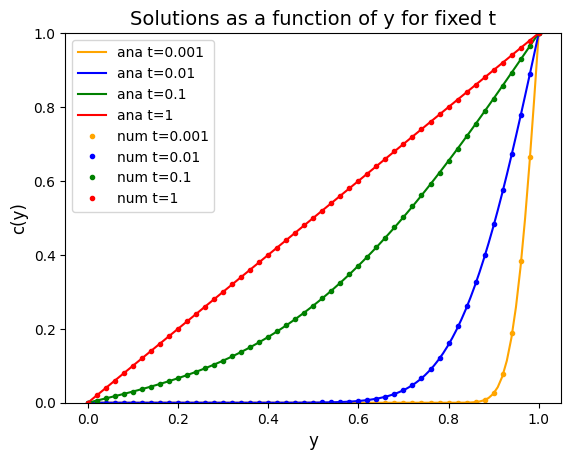

In [277]:
#plot both in the same same figure for comparison. For t= 0.001, 0.01, 0.1 and 1.
plt.plot(yyy,c_ana_0001, color = 'orange',label = 'ana t=0.001')
plt.plot(yyy,c_ana_001, color = 'blue',label = 'ana t=0.01')
plt.plot(yyy,c_ana_01, color = 'green',label = 'ana t=0.1')
plt.plot(yyy,c_ana_1, color = 'red',label = 'ana t=1')
plt.plot(discr_y,c_num_0001,marker = 'o', linestyle="",color = 'orange',markersize = 3, label = 'num t=0.001')
plt.plot(discr_y,c_num_001,marker = 'o', linestyle="",color = 'blue',markersize = 3, label = 'num t=0.01')
plt.plot(discr_y,c_num_01,marker = 'o', linestyle="",color = 'green',markersize = 3,label = 'num t=0.1')
plt.plot(discr_y,c_num_1,marker = 'o', linestyle="",color = 'red',markersize = 3,label = 'num t=1')

plt.legend(loc = "upper left")
plt.ylim(0,1)
plt.xlabel('y', size=12)
plt.ylabel('c(y)', size=12)
plt.title("Solutions as a function of y for fixed t",size = 14)

plt.show()

#just to be explicit: ana = analytical; num = numerical

In [268]:
#comparison in numbers:
c_ana_0001_prime = [analytical_sol(y,0.001) for y in discr_y]
c_ana_001_prime = [analytical_sol(y,0.01) for y in discr_y]
c_ana_01_prime = [analytical_sol(y,0.1) for y in discr_y]
c_ana_1_prime = [analytical_sol(y,1) for y in discr_y]

#compute the maximum differences for each t:
print('maximimum difference for t = 0.001:', np.max(c_ana_0001_prime - c_num_0001))
print('maximimum difference for t = 0.01:', np.max(c_ana_001_prime - c_num_001))
print('maximimum difference for t = 0.1:', np.max(c_ana_01_prime - c_num_01))
print('maximimum difference for t = 1:', np.max(c_ana_1_prime - c_num_1))


maximimum difference for t = 0.001: 0.0002554794173023388
maximimum difference for t = 0.01: 8.874236445090066e-08
maximimum difference for t = 0.1: 0.0
maximimum difference for t = 1: 0.0


1.2 F

In [269]:
c_1 = c_as_fun_of_(1)
c_01 = c_as_fun_of_(0.1)
c_001 = c_as_fun_of_(0.01)
c_0001 = c_as_fun_of_(0.001)

In [270]:
c_0 = np.zeros((N+1,N+1))
c_0[50,:] = 1

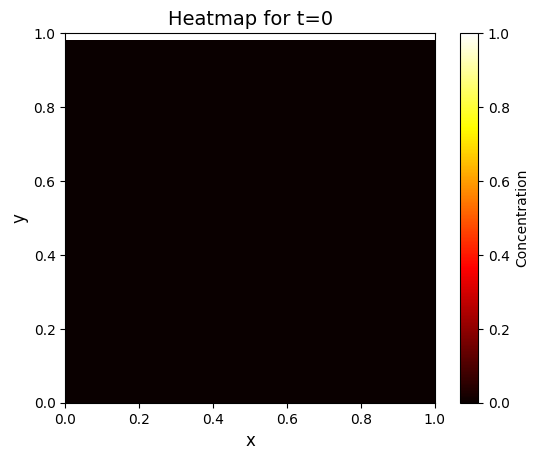

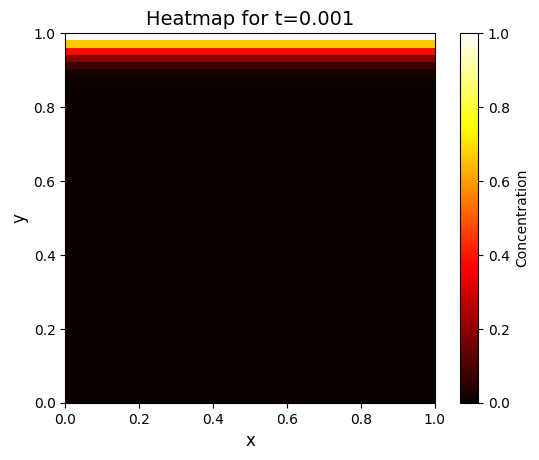

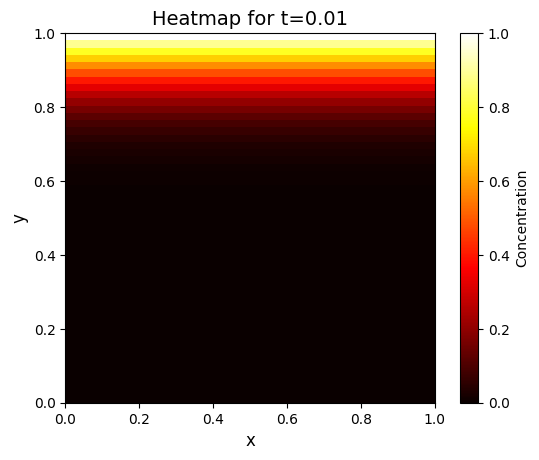

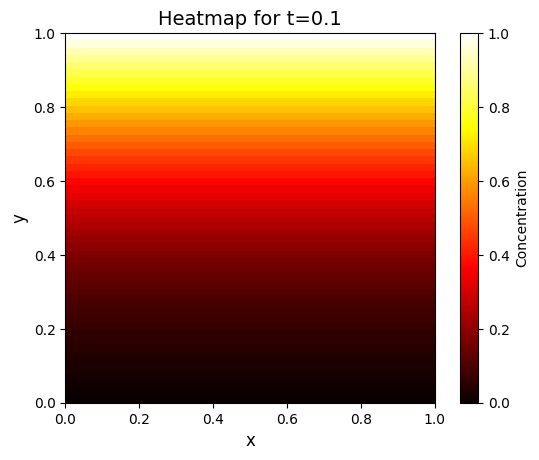

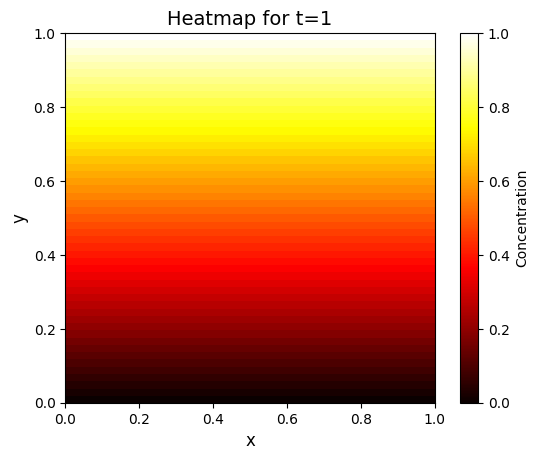

In [279]:
plt.imshow(c_0,cmap='hot',extent=[0,1,0,1], origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap for t=0',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(c_0001,cmap='hot',extent=[0,1,0,1], origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap for t=0.001',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(c_001,cmap='hot',extent=[0,1,0,1], origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap for t=0.01',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(c_01,cmap='hot',extent=[0,1,0,1], origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap for t=0.1',size=14)
plt.colorbar(label='Concentration')
plt.show()

plt.imshow(c_1,cmap='hot',extent=[0,1,0,1], origin = 'lower')
plt.xlabel('x',size=12)
plt.ylabel('y',size=12)
plt.title('Heatmap for t=1',size=14)
plt.colorbar(label='Concentration')
plt.show()

1.2 G

In [272]:
GGG = np.vstack([c_0[:,20],c_num_0001,c_num_001,c_num_01,c_num_1])
#print(c_0[:,20],c_num_0001,c_num_001,c_num_01,c_num_1,c_num_0001)

SyntaxError: invalid syntax (3061871893.py, line 1)

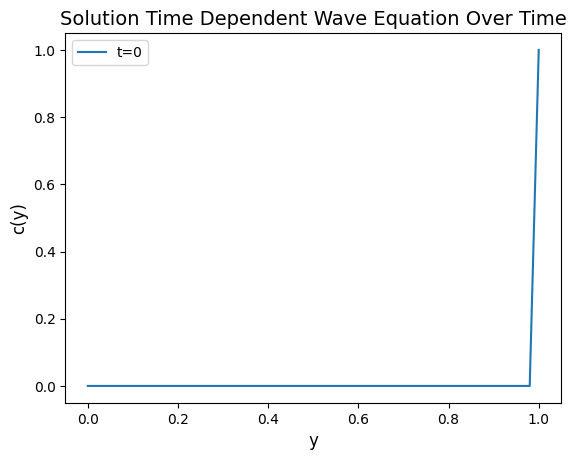

In [309]:
time_labels = ["t=0", "t=0.0001", "t=0.001", "t=0.01", "t=1"]
fig, ax = plt.subplots()
line2, = ax.plot(discr_y, GGG[0, :], label=time_labels[0])
legend = ax.legend()
ax.set_title("Solution Time Dependent Wave Equation Over Time",size = 14)
ax.set_xlabel("y",size = 12)
ax.set_ylabel("c(y)",size =12)

def update(frame):
    line2.set_ydata(GGG[frame, :])  
    line2.set_label(time_labels[frame])  
    legend = ax.legend()
    return line2, legend
    
animationn = animation.FuncAnimation(fig, update, frames=len(GGG), interval=600, blit=False)

HTML(animationn.to_jshtml())

